In [2]:
import numpy as np
import matplotlib.pyplot as plt
import PyCrystalField as cef


 *******************************************************
 *                PyCrystalField 2.3.9                 *
 *  Please cite  J. Appl. Cryst. (2021). 54, 356-362   * 
 *    <https://doi.org/10.1107/S160057672001554X>      *
 *******************************************************



In [3]:
'''
Okay so some immediate notes: 

I hate jupyter notebook but I understand :(
some issues with variable naming. It looks like this was born out of a Pr tutorial - fine and good but I kinda wanna do some changing
could be good to just have like, a script to do what I want that I can just input the ion + user defined params to use. idk, prolly not
worth the time. 
'''

'\nOkay so some immediate notes: \n\nI hate jupyter notebook but I understand :(\nsome issues with variable naming. It looks like this was born out of a Pr tutorial - fine and good but I kinda wanna do some changing\ncould be good to just have like, a script to do what I want that I can just input the ion + user defined params to use. idk, prolly not\nworth the time. \n'

In [4]:
########### Define Stevens Operators 
Bparams = {'B20': -2.773e-2, 'B40':-3.987e-4,'B43': -1.416e-2, 'B60': 3.152e-6, 
           'B63':-7.616e-6,'B66':3.275e-5} # define as dict
model2 = {'B20': 2.720e-2, 'B40':-4.864e-4,'B43': 1.282-2, 'B60': 1.028e-6, 
           'B63':4.764e-5,'B66':2.113e-5}                 

Pr = cef.CFLevels.Bdict('Er3+',Bparams)

In [5]:
########### print eigenvectors
Pr.printEigenvectors()
print(Pr.eigenvalues * 8.066) # whats this 8??? looks like its to get energies in mev but what unit were they in before


 Eigenvalues 	 Eigenvectors
		-----------------------------------------------------------------------------------------------------------------------
0.00000 	|  [ 0.     0.     0.118  0.     0.    -0.347  0.     0.     0.582  0.
  0.     0.508  0.     0.     0.518  0.   ]  |
0.00000 	|  [ 0.     0.518  0.     0.    -0.508  0.     0.     0.582  0.     0.
  0.347  0.     0.     0.118  0.     0.   ]  |
0.90187 	|  [ 0.721  0.     0.    -0.488  0.     0.     0.425  0.     0.     0.246
  0.     0.     0.034  0.     0.     0.   ]  |
0.90187 	|  [ 0.     0.     0.     0.034  0.     0.    -0.246  0.     0.     0.425
  0.     0.     0.488  0.     0.     0.721]  |
3.48811 	|  [ 0.     0.709  0.     0.    -0.109  0.     0.    -0.684  0.     0.
 -0.098  0.     0.     0.084  0.     0.   ]  |
3.48811 	|  [ 0.     0.    -0.084  0.     0.    -0.098  0.     0.     0.684  0.
  0.    -0.109  0.     0.    -0.709  0.   ]  |
5.13312 	|  [ 0.     0.    -0.708  0.     0.     0.619  0.     0.     0.244  0.
 

Text(17, 1.9, 'KErSe$_2$ simulation')

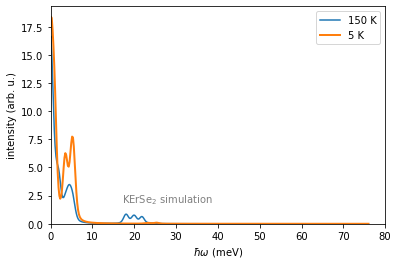

In [6]:
########### plot neutron spectrum

hw = np.linspace(-5,76,400)
intens1 = Pr.normalizedNeutronSpectrum(hw, Temp=5, ResFunc= lambda x: 1, gamma = 0.5)
intens2 = Pr.normalizedNeutronSpectrum(hw, Temp=150, ResFunc= lambda x: 1, gamma = 0.5)

plt.figure()
plt.plot(hw, intens2, label='150 K')
plt.plot(hw, intens1, lw=2, label='5 K')

plt.ylim(0,)
plt.xlim(0,)
plt.xlabel('$\\hbar \\omega$ (meV)')
plt.ylabel('intensity (arb. u.)')
plt.legend()
plt.text(17,1.9,'KErSe$_2$ simulation', color='grey')


# is this just for checking if the neutron spec looks fine? 
# is this 

In [22]:
ion = 'Er3+'

# clean up this syntax. what is obj??????? 
# so the zeeman splitting is kinda the bread and butter here - learn more


def zeemansplitting(obj, Field):
    '''Calculate eigenvalues of CEF spectrum in field'''

    # A) Define magnetic Hamiltonian
    
    muB = 5.7883818012e-2  # meV/T
    
    #mu0 = np.pi*4e-7       # T*m/A
    JdotB = muB*(Field[0]*cef.Operator.Jx(obj.J) + Field[1]*cef.Operator.Jy(obj.J) +\
                 Field[2]*cef.Operator.Jz(obj.J))*cef.LandeGFactor(ion)
    
    # B) Diagonalize full Hamiltonian
    
    oldH  =np.sum([a*b for a,b in zip(obj.O, obj.B)], axis=0)
    print(oldH)
    obj.diagonalize(oldH + JdotB.O)
    
    # hmmmmmmmm okay I'm not sure if this totally makes sense to me
    return obj.eigenvalues


Bfield = np.linspace(0,17,300)
# Calculate eigenvalues for each field
CalcEvs_a, CalcEvs_b, CalcEvs_c = [], [], []
for B in Bfield:
    CalcEvs_a.append(zeemansplitting(Pr, [B,0,0]))
    CalcEvs_b.append(zeemansplitting(Pr, [0,B,0]))
    CalcEvs_c.append(zeemansplitting(Pr, [0,0,B]))
CalcEvs_a = np.array(CalcEvs_a)
CalcEvs_b = np.array(CalcEvs_b)
CalcEvs_c = np.array(CalcEvs_c)

[[-6.6027192   0.          0.          6.08009734  0.          0.
   0.83409563  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -4.68143424  0.          0.          8.53622039  0.
   0.          1.70938737  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          2.83426992  0.          0.          9.08714621
   0.          0.          2.58435079  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 6.08009734  0.          0.          7.46902848  0.          0.
   8.10331778  0.          0.          3.28465253  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          8.53622039  0.          0.          6.96557664  0.
   0.          5.99801844  0.          0.          3.67235317  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          9.08714621  0.          0.          2.6635464
   0

[[-6.6027192   0.          0.          6.08009734  0.          0.
   0.83409563  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -4.68143424  0.          0.          8.53622039  0.
   0.          1.70938737  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          2.83426992  0.          0.          9.08714621
   0.          0.          2.58435079  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 6.08009734  0.          0.          7.46902848  0.          0.
   8.10331778  0.          0.          3.28465253  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          8.53622039  0.          0.          6.96557664  0.
   0.          5.99801844  0.          0.          3.67235317  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          9.08714621  0.          0.          2.6635464
   0

[[-6.6027192   0.          0.          6.08009734  0.          0.
   0.83409563  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -4.68143424  0.          0.          8.53622039  0.
   0.          1.70938737  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          2.83426992  0.          0.          9.08714621
   0.          0.          2.58435079  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 6.08009734  0.          0.          7.46902848  0.          0.
   8.10331778  0.          0.          3.28465253  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          8.53622039  0.          0.          6.96557664  0.
   0.          5.99801844  0.          0.          3.67235317  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          9.08714621  0.          0.          2.6635464
   0

[[-6.6027192   0.          0.          6.08009734  0.          0.
   0.83409563  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -4.68143424  0.          0.          8.53622039  0.
   0.          1.70938737  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          2.83426992  0.          0.          9.08714621
   0.          0.          2.58435079  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 6.08009734  0.          0.          7.46902848  0.          0.
   8.10331778  0.          0.          3.28465253  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          8.53622039  0.          0.          6.96557664  0.
   0.          5.99801844  0.          0.          3.67235317  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          9.08714621  0.          0.          2.6635464
   0

[[-6.6027192   0.          0.          6.08009734  0.          0.
   0.83409563  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -4.68143424  0.          0.          8.53622039  0.
   0.          1.70938737  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          2.83426992  0.          0.          9.08714621
   0.          0.          2.58435079  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 6.08009734  0.          0.          7.46902848  0.          0.
   8.10331778  0.          0.          3.28465253  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          8.53622039  0.          0.          6.96557664  0.
   0.          5.99801844  0.          0.          3.67235317  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          9.08714621  0.          0.          2.6635464
   0

[[-6.6027192   0.          0.          6.08009734  0.          0.
   0.83409563  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -4.68143424  0.          0.          8.53622039  0.
   0.          1.70938737  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          2.83426992  0.          0.          9.08714621
   0.          0.          2.58435079  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 6.08009734  0.          0.          7.46902848  0.          0.
   8.10331778  0.          0.          3.28465253  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          8.53622039  0.          0.          6.96557664  0.
   0.          5.99801844  0.          0.          3.67235317  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          9.08714621  0.          0.          2.6635464
   0

[[-6.6027192   0.          0.          6.08009734  0.          0.
   0.83409563  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -4.68143424  0.          0.          8.53622039  0.
   0.          1.70938737  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          2.83426992  0.          0.          9.08714621
   0.          0.          2.58435079  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 6.08009734  0.          0.          7.46902848  0.          0.
   8.10331778  0.          0.          3.28465253  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          8.53622039  0.          0.          6.96557664  0.
   0.          5.99801844  0.          0.          3.67235317  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          9.08714621  0.          0.          2.6635464
   0

[[-6.6027192   0.          0.          6.08009734  0.          0.
   0.83409563  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -4.68143424  0.          0.          8.53622039  0.
   0.          1.70938737  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          2.83426992  0.          0.          9.08714621
   0.          0.          2.58435079  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 6.08009734  0.          0.          7.46902848  0.          0.
   8.10331778  0.          0.          3.28465253  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          8.53622039  0.          0.          6.96557664  0.
   0.          5.99801844  0.          0.          3.67235317  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          9.08714621  0.          0.          2.6635464
   0

[[-6.6027192   0.          0.          6.08009734  0.          0.
   0.83409563  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -4.68143424  0.          0.          8.53622039  0.
   0.          1.70938737  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          2.83426992  0.          0.          9.08714621
   0.          0.          2.58435079  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 6.08009734  0.          0.          7.46902848  0.          0.
   8.10331778  0.          0.          3.28465253  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          8.53622039  0.          0.          6.96557664  0.
   0.          5.99801844  0.          0.          3.67235317  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          9.08714621  0.          0.          2.6635464
   0

  -6.08009734  0.          0.         -6.6027192 ]]


In [18]:
print(CalcEvs_c)
print(Pr.eigenvalues)

[[0.00000000e+00 1.19683447e+00 5.96612349e+00 ... 3.52579685e+01
  3.60200907e+01 3.67082921e+01]
 [0.00000000e+00 1.20209361e+00 5.97996864e+00 ... 3.53007508e+01
  3.60630214e+01 3.67535468e+01]
 [0.00000000e+00 1.21382541e+00 6.00782994e+00 ... 3.53838418e+01
  3.61491121e+01 3.68489360e+01]
 ...
 [0.00000000e+00 2.89876326e+02 5.89652707e+02 ... 3.92690537e+03
  4.23360251e+03 4.55121643e+03]
 [0.00000000e+00 2.91911872e+02 5.93727824e+02 ... 3.95340308e+03
  4.26213950e+03 4.58178989e+03]
 [0.00000000e+00 2.93954289e+02 5.97816639e+02 ... 3.97998974e+03
  4.29077226e+03 4.61246598e+03]]
[   0.          293.95428929  597.81663908  906.90969488 1217.96685399
 1529.09248666 1839.33493174 2148.27876843 2455.77518746 2761.81768697
 3066.55071197 3370.39518153 3674.27824893 3979.98973983 4290.77225973
 4612.46598016]


In [19]:
print(CalcEvs_b.T.shape)
print(Bfield.shape)

(16, 300)
(300,)


Value at Bfield=0 for curve 1: 9.65 cm^-1
Value at Bfield=0 for curve 2: 48.12 cm^-1
Value at Bfield=0 for curve 3: 62.32 cm^-1
Value at Bfield=0 for curve 4: 67.00 cm^-1
Value at Bfield=0 for curve 5: 72.53 cm^-1
Value at Bfield=0 for curve 6: 96.18 cm^-1
Value at Bfield=0 for curve 7: 128.16 cm^-1
Value at Bfield=0 for curve 8: 128.59 cm^-1
Value at Bfield=0 for curve 9: 148.80 cm^-1
Value at Bfield=0 for curve 10: 211.32 cm^-1
Value at Bfield=0 for curve 11: 218.94 cm^-1
Value at Bfield=0 for curve 12: 219.99 cm^-1
Value at Bfield=0 for curve 13: 284.39 cm^-1
Value at Bfield=0 for curve 14: 290.54 cm^-1
Value at Bfield=0 for curve 15: 296.09 cm^-1


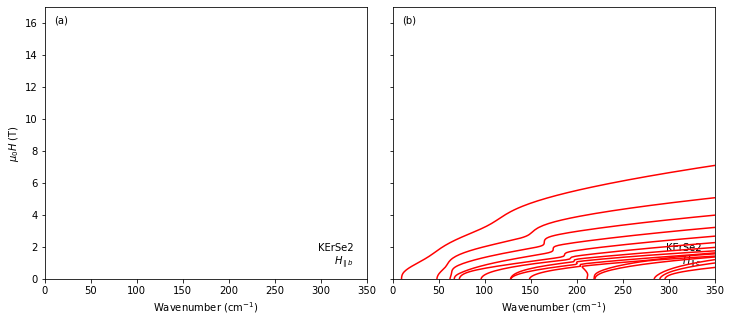

In [20]:
f, ax = plt.subplots(1,2, figsize=(12,5), sharex=True, sharey=True)
mevtocm = 8.066
norm = plt.Normalize(0, 6)

for i, cev in enumerate(CalcEvs_b.T):
    if i > 0:
        #ax[0].plot(cev*mevtocm, Bfield, color='r',zorder=10)#pf.cpal1[0]
        ax[1].plot(CalcEvs_c.T[i]*mevtocm, Bfield, color='r',zorder=10)#pf.cpal1[0]
        value_at_zero = CalcEvs_c.T[i, 0] * mevtocm
        print(f'Value at Bfield=0 for curve {i}: {value_at_zero:.2f} cm^-1')
ax[0].set_ylabel('$\\mu_0 H$ (T)')
abc = 'abc'
for i in range(len(ax)):
    ax[i].set_xlim(0,350)
    ax[i].set_ylim(0,17)
    ax[i].set_xlabel('Wavenumber (cm$^{-1}$)')
    ax[i].text(0.96,0.03, 'KErSe2\n$H_{\\parallel '+abc[i+1]+'}$', 
                ha='right', va='bottom', transform=ax[i].transAxes)
    plt_label = ['(a)','(b)','(c)']
    ax[i].text(0.03,0.97, plt_label[i], transform=ax[i].transAxes, va='top')#pf.parSubPlotLabel(i)
# ax[0].set_title('Calculated CsErSe$_2$ CEF eigenvalues', fontsize=15)

f.subplots_adjust(wspace=0.08)

Text(0, 0.5, '$\\mu_0 H_{\\parallel c}$ (T)')

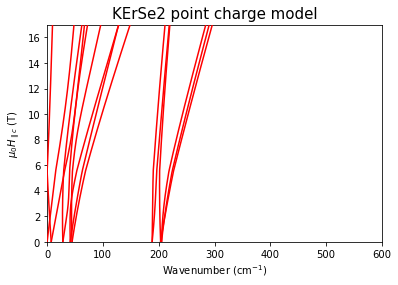

In [11]:
f, ax = plt.subplots()
for i, cev in enumerate(CalcEvs_b.T):
    if i > 0:
        ax.plot(CalcEvs_c.T[i]*mevtocm, Bfield, color='r',zorder=10) #pf.cpal1[0]

ax.set_xlim(0,600)
ax.set_ylim(0,17)
ax.set_xlabel('Wavenumber (cm$^{-1}$)')
ax.set_title('KErSe2 point charge model', fontsize=15)
ax.set_ylabel('$\\mu_0 H_{\\parallel c}$ (T)')

#plt.savefig('CsPrSe2_C-axis-splitting.pdf')

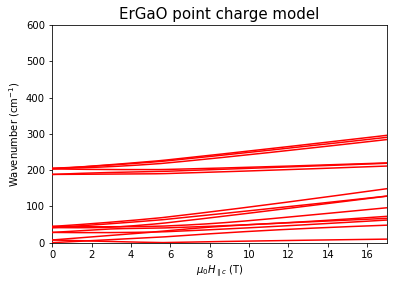

In [12]:
f, ax = plt.subplots()
for i, cev in enumerate(CalcEvs_b.T):
    if i > 0:
        ax.plot(Bfield, CalcEvs_c.T[i]*mevtocm, color='r',zorder=10) #pf.cpal1[0]

ax.set_ylim(0,600)
ax.set_xlim(0,17)
ax.set_ylabel('Wavenumber (cm$^{-1}$)')
ax.set_title('ErGaO point charge model', fontsize=15)
ax.set_xlabel('$\\mu_0 H_{\\parallel c}$ (T)')

from scipy.io import savemat
plot_data = {
    'Bfield': Bfield,
    'CalcEvs_c': CalcEvs_c,
    'mevtocm': mevtocm
}

savemat('ErGaO_data.mat', plot_data)
#plt.savefig('EGO_C-axis-splitting.png')
